In [180]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [181]:
read = emcee.backends.HDFBackend("SDP_jam.h5")

In [182]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [183]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

-2542.737390643866


In [184]:
#parameters of best walker
best_walker = chain[best_log][1]

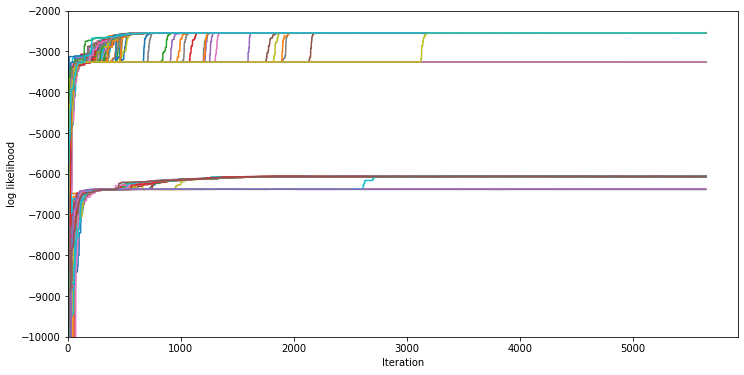

In [185]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -2000)
    plt.xlim(0)
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

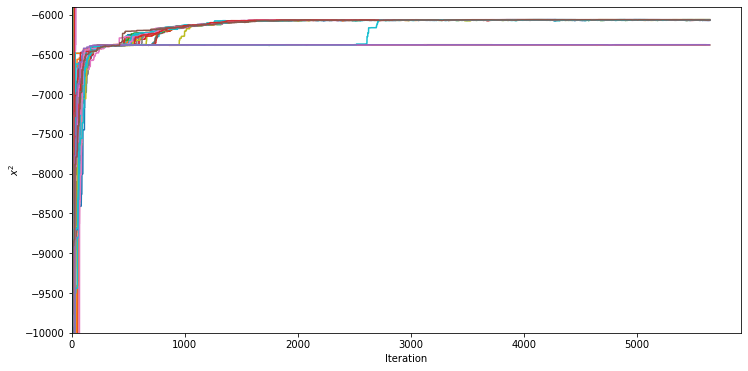

In [186]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -5900)
    plt.xlim(0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [187]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([ 455., 1405., 1242., 1385.,  552., 1222.,  625., 1372.,  397.,
        529., 1350., 1273.,  593.,  497., 1403., 1333., 1317.,  488.,
        522.,  517.,  639., 1168.,  267., 1184., 1254.,  472., 1368.,
        232., 1327., 1364., 1383.,  563.,  479., 1440.,  486., 1243.,
       1209., 1146., 1354.,  624.,  468.,  253., 1321.,  404., 1267.,
       1349., 1327.,  530.,  539.,  587.,  562.,  576., 1450., 1361.,
       1405.,  608., 1482., 1235., 1371., 1301., 1382., 1479.,  562.,
        498.,  581.,  479.,  528., 1175., 1257., 1328., 1271., 1217.,
       1403.,  556., 1361., 1350., 1263., 1346.,  599.,  498., 1307.,
       1165., 1305., 1277., 1283., 1228.,  469.,  542., 1428.,  523.,
       1412., 1321., 1321., 1356., 1221., 1323.,  465., 1333., 1254.,
       1408., 1319., 1344., 1217.,  462., 1256., 1206.,  206., 1315.,
       1213.,  469., 1319., 1357., 1326., 1357.,  207.,  534., 1442.,
       1316., 1119., 1316.])

[384.36450803 109.59600522 247.36203332 249.3642697  444.74753361
 531.8037335 ]
flat chain shape: (677520, 6)
flat log prob shape: (677520,)


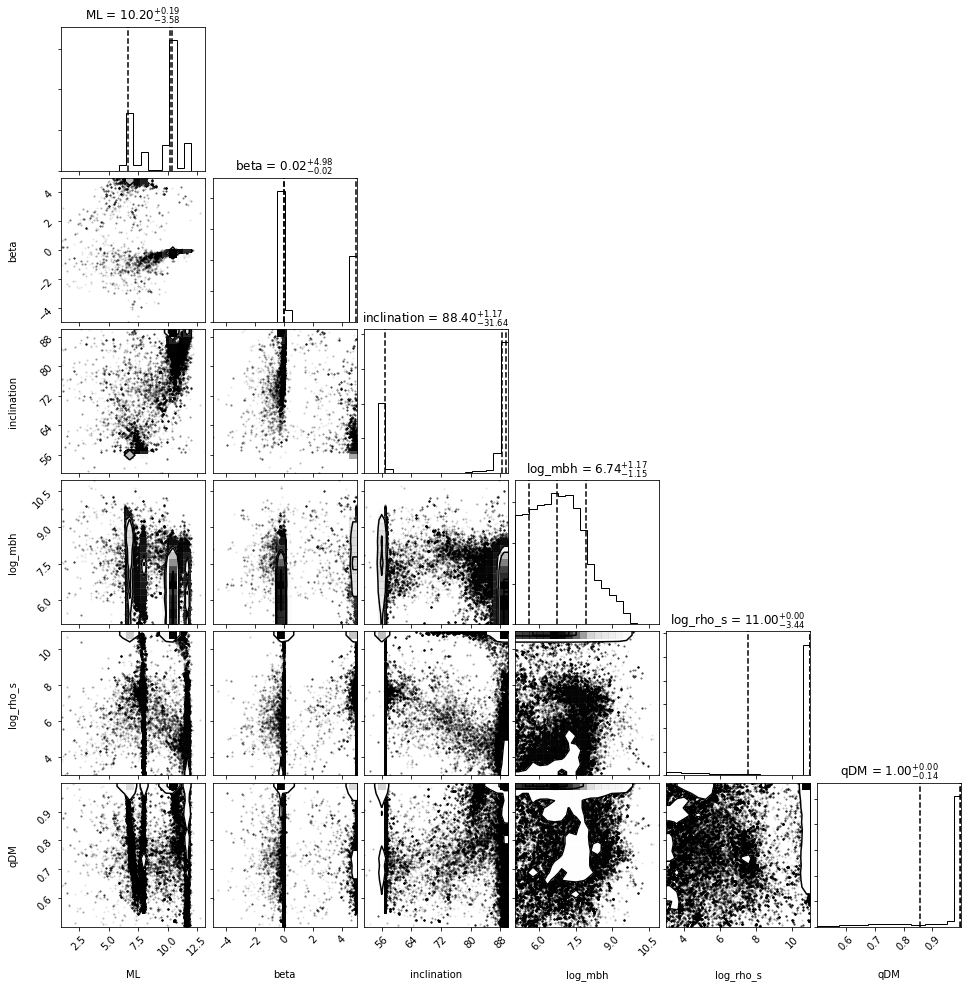

In [188]:
#Corner plots

labels = ["ML", "beta", "inclination", "log_mbh", "log_rho_s", "qDM"]


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

1063 265
flat chain shape: (2040, 6)
flat log prob shape: (2040,)


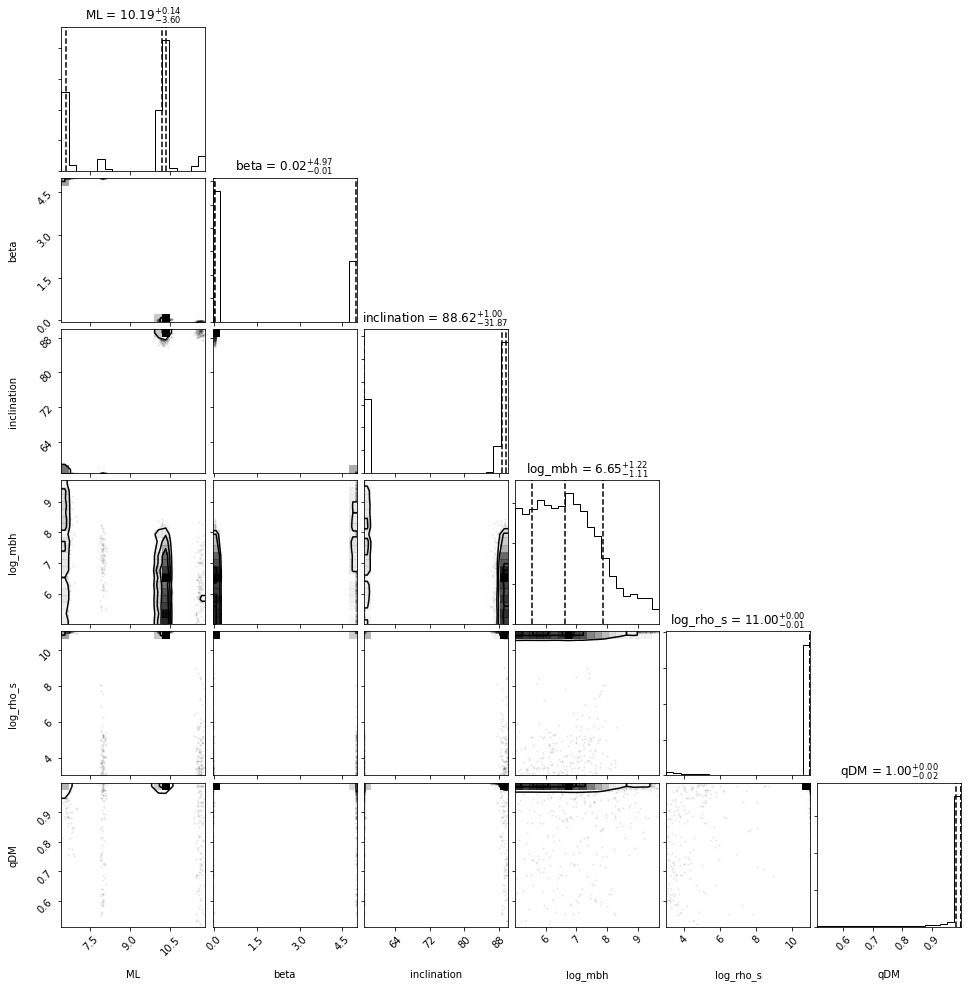

In [189]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels =["ML", "beta", "inclination", "log_mbh", "log_rho_s", "qDM"]


samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [190]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels)-1)

for i in range(6):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [191]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 5 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 113;
tau: [384.36450803 109.59600522 247.36203332 249.3642697  444.74753361
 531.8037335 ]

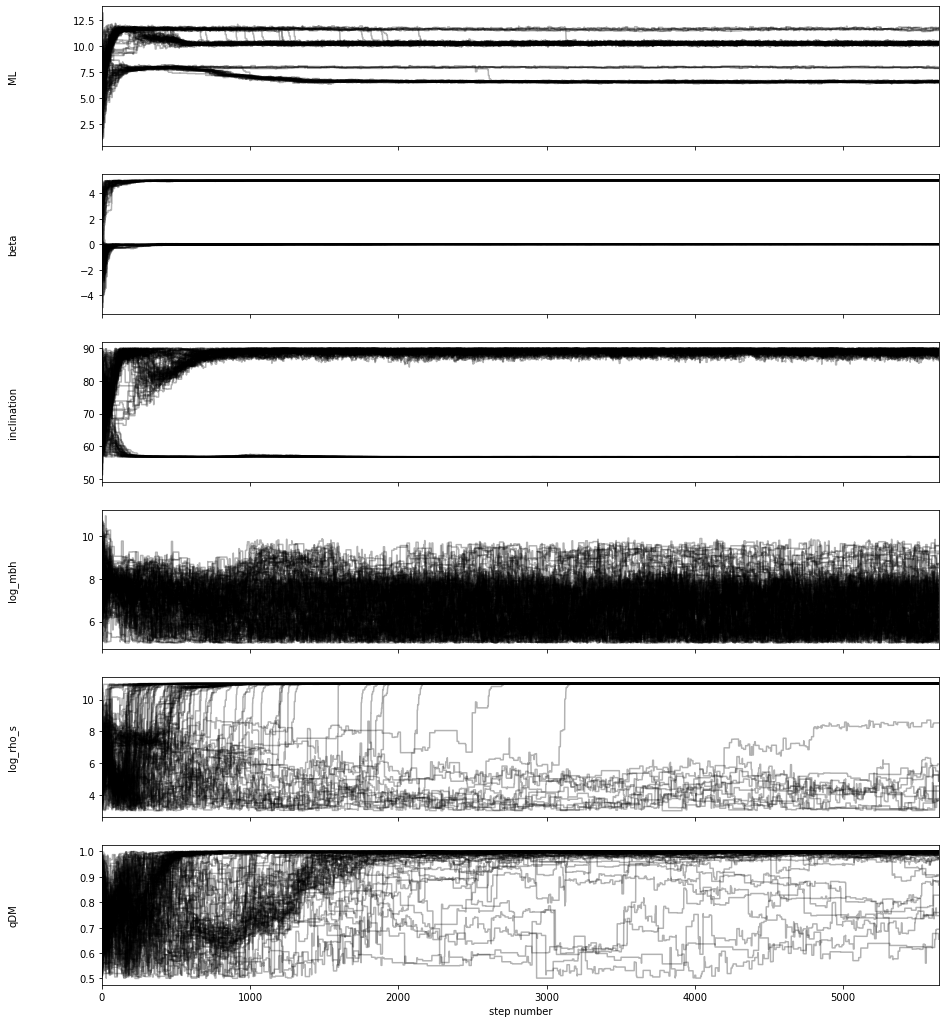

In [192]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [15]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile2.txt", unpack=True)

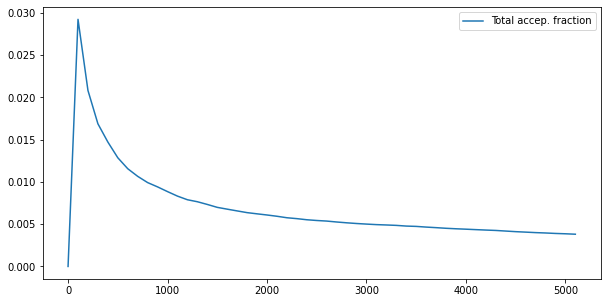

In [16]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

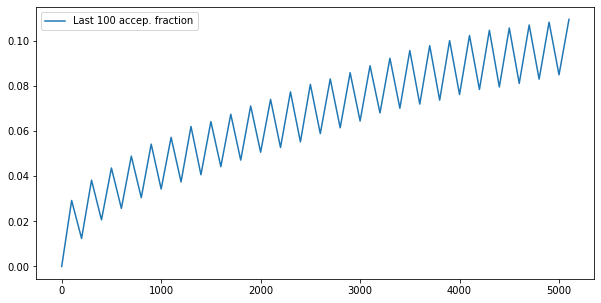

In [17]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [20]:
#General packages
import numpy as np
from My_Jampy import JAM
import emcee
import matplotlib.pyplot as plt

#MPI
from schwimmbad import MPIPool

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.constants import G, M_sun, c
import astropy.units as u



#Useful constants
metre2Mpc = (1*u.m).to(u.Mpc)/u.m           #Constant factor to convert metre to Mpc.
kg2Msun = (1*u.kg/M_sun)*u.solMass/u.kg     #Constant factor to convert kg to Msun

G_Mpc = G*(metre2Mpc)**3/kg2Msun            #Gravitational constant in Mpc³/(Msun s²)
c_Mpc = c*metre2Mpc                         #Speed of light in Mpc/s




In [176]:
def run(pos):
    ml, beta, inc, log_mbh, log_rho, qdm = pos
    
       #Dataset path
    data_folder = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/Emcee/Data/"

    #Reading MGE inputs
        #attention to units
    surf_lum, sigma_lum, qobs_lum = np.loadtxt(data_folder+"JAM_Input.txt", unpack=True)          #MGE decomposition
    surf_dm, sigma_dm , qobs_dm   = np.loadtxt(data_folder+"SDP81_pseudo-DM.txt", unpack=True)    #DM component
    norm_psf, sigma_psf           = np.loadtxt(data_folder+"MUSE_Psf_model.txt", unpack=True)     #PSF
    ybin, xbin, vrms, erms        = np.loadtxt(data_folder+"pPXF_rot_data.txt", unpack=True)          #Vrms data

    muse_pixsize = 0.2                            #Muse pixel size [arcsec/px]

    z_lens   = 0.299                                    #Lens redshifth
    z_source = 3.100                                    #Source redshift

    #Angular diameter distances
    D_l = cosmo.angular_diameter_distance(z_lens)                   #Lens              
    D_s = cosmo.angular_diameter_distance(z_source)                 #Source
    D_ls = cosmo.angular_diameter_distance_z1z2(z_lens, z_source)   #Lens to source
    
    beta = np.full_like(surf_lum, beta)
    qdm  = np.full_like(surf_dm, qdm)

    

    Jam_model = JAM(ybin=ybin, xbin=xbin, inc=inc, distance=D_l.value, mbh=10**log_mbh, beta=beta, rms=vrms,
                        erms=erms,normpsf=norm_psf, sigmapsf=sigma_psf*muse_pixsize, pixsize=muse_pixsize)

        #Add Luminosity component
    Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml)
        #Add DM component
    Jam_model.DM_component(surf_dm=10**(log_rho) * surf_dm, sigma_dm=sigma_dm, qobs_dm=qdm)

    Jam_model.run(plot=True, quiet=False)

## Best Model

jam_axi_rms elapsed time sec: 0.44
inc=88.6 beta_z=0.02 M/L=1 BH=4.74e+06 chi2/DOF=21.9
Total mass MGE: 2.989e+12


array([1.01904715e+01, 2.11915389e-02, 8.86494350e+01, 6.67608134e+00,
       1.09989930e+01, 9.97576951e-01])

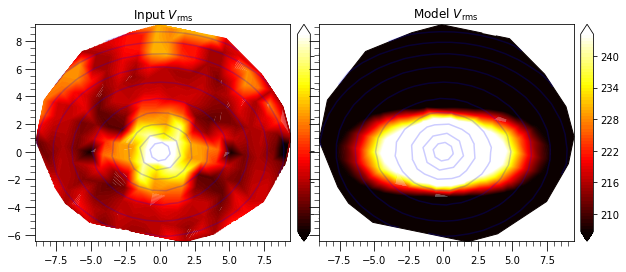

In [177]:
plt.figure(figsize=(10,10))
run(p0)
p0

## Best likelihood

In [193]:
p0 = best_walker

jam_axi_rms elapsed time sec: 0.46
inc=89.8 beta_z=0.02 M/L=1 BH=1.28e+06 chi2/DOF=21.8
Total mass MGE: 3e+12


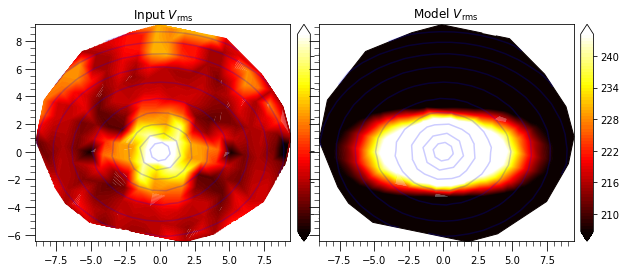

In [194]:
plt.figure(figsize=(10,10))
run(p0)